In [19]:
#jupyter下引入所需要的包
import numpy as np                            #引入numpy包并记为np,开源的数值计算扩展工具包
import pandas as pd                           #pandas:基于numpy 的一种工具，操作数据集利器
import seaborn as sns                         #seaborn:作图利器，可视为matplotlib的补充
import matplotlib.pyplot as plt
import statsmodels.api as sm                  #statsmodels:用于拟合多种统计模型的库
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, glm  #ols:最小二乘法，glm:广义线性模型


#将数据集读入到pandas数据框中
#read_csv方法，分隔符为',',header = 0是默认情况，表示以数据的第一行为列索引，用head函数检查一下标题行和前5行数据
wine = pd.read_csv('winequality-both.csv', sep=',', header=0)       
wine.columns = wine.columns.str.replace(' ', '_')                   #用_代替空格
print(wine.head())

# 显示所有变量的描述性统计量
print(wine.describe())

# 找出质量的唯一值，并升序打印
print(sorted(wine.quality.unique()))

# 计算质量值的频率并降序打印
print(wine.quality.value_counts()) 

  type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0  red            7.4              0.70         0.00             1.9   
1  red            7.8              0.88         0.00             2.6   
2  red            7.8              0.76         0.04             2.3   
3  red           11.2              0.28         0.56             1.9   
4  red            7.4              0.70         0.00             1.9   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8  

                type 
quality  count  red      1599.000000
                white    4898.000000
         mean   red         5.636023
                white       5.877909
         std    red         0.807569
                white       0.885639
         min    red         3.000000
                white       3.000000
         25%    red         5.000000
                white       5.000000
         50%    red         6.000000
                white       6.000000
         75%    red         6.000000
                white       6.000000
         max    red         8.000000
                white       9.000000
dtype: float64
     quality      
type     red white
0.25     5.0   5.0
0.75     6.0   6.0


F:\Python\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


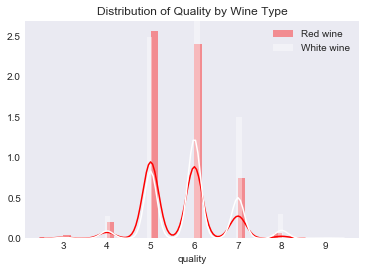

        quality          
            std      mean
type                     
red    0.807569  5.636023
white  0.885639  5.877909
tstat: -9.686  pvalue: 0.0000


In [20]:
# 按照葡萄酒类型显示质量的描述性统计量，groupby函数使用type列的两个值将数据分组，[]生成列表，unstack函数使红白酒并排
print(wine.groupby('type')[['quality']].describe().unstack('type'))

# # 按照葡萄酒类型显示质量的特定分位数值，使用quantile函数对质量列计算第25%和第75%
print(wine.groupby('type')[['quality']].quantile([0.25, 0.75]).unstack('type'))
# 按照葡萄酒类型查看质量分布
import sys
red_wine = wine.ix[wine['type']=='red', 'quality']
white_wine = wine.ix[wine['type']=='white', 'quality']

sns.set_style("dark")       #绘图，设置图像背景色
#使用seaborn的distplot绘图函数绘制分布直方图，通过hist和kde参数调节是否显示直方图及密度估计(默认hist,kde均为True)
print(sns.distplot(red_wine, \
		norm_hist=True, kde=True, color="red", label="Red wine"))
print(sns.distplot(white_wine, \
		norm_hist=True, kde=True, color="white", label="White wine"))
# sns.axlabel("Quality Score", "Density")                #横纵坐标标记，这里省去
plt.title("Distribution of Quality by Wine Type")        #设置图的标题
plt.legend()                                             #可设置图的位置，图例，字体大小等参数
plt.show()                                               #显示图像

# 检验红葡萄酒和白葡萄酒的平均质量是否有所不同
print(wine.groupby(['type'])[['quality']].agg(['std', 'mean']))
tstat, pvalue, df = sm.stats.ttest_ind(red_wine, white_wine)
print('tstat: %.3f  pvalue: %.4f' % (tstat, pvalue))


                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

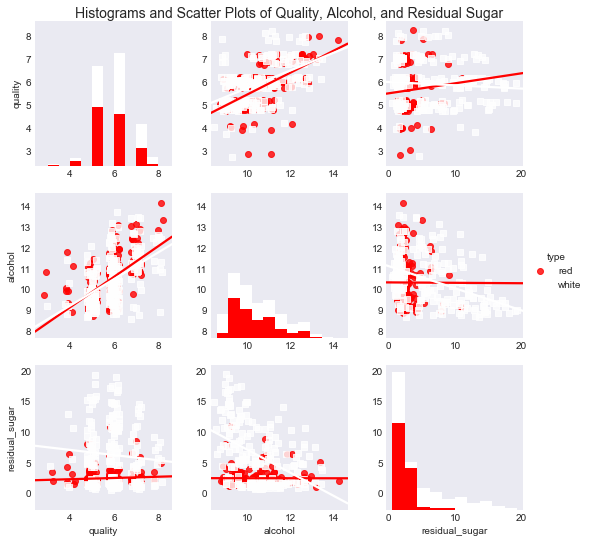

In [21]:
#计算所有变量的相关矩阵，corr函数可计算数据集中所有变量两两之间的线性相关性
print(wine.corr())

#从红葡萄酒和白葡萄酒的数据中取出一个“小”样本来进行绘图
#定义take_sample函数，抽取样本点.使用numpy的random.choice函数随机选择行的子集
def take_sample(data_frame, replace=False, n=200):
	return data_frame.loc[np.random.choice(data_frame.index, replace=replace, size=n)]	 

reds_sample = take_sample(wine.loc[wine['type']=='red', :])
whites_sample = take_sample(wine.loc[wine['type']=='white', :])
#将抽样所得两个数据框连接
wine_sample = pd.concat([reds_sample, whites_sample]) 

#生成新列并填充0或1，来判断数据是否在抽样数据中
wine['in_sample'] = np.where(wine.index.isin(wine_sample.index), 1.,0.)
print(pd.crosstab(wine.in_sample,wine.type,margins=True))

#查看成对变量之间的关系
sns.set_style("dark")      #背景色
g = sns.pairplot(wine_sample, kind='reg', plot_kws={"ci": False, "x_jitter": 0.25, "y_jitter": 0.25}, \
hue='type', diag_kind='hist', diag_kws={"bins": 10, "alpha": 1.0}, palette=dict(red="red", white="white"), \
markers=["o", "s"], vars=['quality', 'alcohol', 'residual_sugar'])
print(g)
#设置标题字体、位置等参数并打印图
plt.suptitle('Histograms and Scatter Plots of Quality, Alcohol, and Residual Sugar', fontsize=14, \
		horizontalalignment='center', verticalalignment='top',
		x=0.5, y=0.999)
plt.show()

In [22]:
# 拟合多元线性模型

#将字符串赋给变量my_formula，~为分割符号，左侧是因变量，右侧是自变量
my_formula = 'quality ~ alcohol + chlorides + citric_acid + density\
+ fixed_acidity + free_sulfur_dioxide + pH + residual_sugar + sulphates\
+ total_sulfur_dioxide + volatile_acidity'
#使用公式和数据拟合一个普通最小二乘回归模型，并将结果赋给lm
lm = ols(my_formula, data=wine).fit()

#或者，也可以使用广义线性模型(glm)语法进行线性分析
#lm = smf.glm(formula_all, data=wine_standardized, family=sm.families.Gaussian()).fit()

print(lm.summary())                                                    #打印摘要信息
print("\nQuantities you can extract from the result:\n%s" % dir(lm))
print("\nCoefficients:\n%s" % lm.params)                               #lm.params以一个序列的形式返回模型系数
print("\nCoefficient Std Errors:\n%s" % lm.bse)                        #同样以序列的形式返回模型系数的标准差
print("\nAdj. R-squared:\n%.2f" % lm.rsquared_adj)                     #返回修正R方
print("\nF-statistic: %.1f  P-value: %.2f" % (lm.fvalue, lm.f_pvalue))  #返回F统计值和p值
print("\nNumber of obs: %d  Number of fitted values: %s" % (lm.nobs, len(lm.fittedvalues)))   #返回拟合值

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Fri, 28 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:40:49   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627 

In [23]:
#创建一个名为dependent_variable的序列来保存质量数据
dependent_variable = wine['quality']

#创建一个名为independent_variables的数据框
#来保存初始的葡萄酒数据集中除quality、type和in_sample之外的所有变量
independent_variables = wine[wine.columns.difference(['quality', 'type', 'in_sample'])]

#对自变量进行标准化
#对每个变量，在每个观测中减去变量的均值
#并且使用结果除以变量的标准差
independent_variables_standardized = (independent_variables - independent_variables.mean()) / independent_variables.std()

#将因变量quality作为一列添加到自变量数据框中，创建一个带有标准化自变量的新数据集
wine_standardized = pd.concat([dependent_variable, independent_variables_standardized], axis=1)

lm_standardized = ols(my_formula, data=wine_standardized).fit()
print(lm_standardized.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Fri, 28 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:40:50   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8184 

In [30]:
# 使用葡萄酒数据集中的前10个观测创建10个“新”观测
#新观测中只包含模型中使用的自变量
new_observations = wine.ix[wine.index.isin(range(10)), independent_variables.columns]

#基于新观测中的葡萄酒特性预测质量评分， 将预测值保留两位小数输出
y_predicted_rounded = [round(score, 2) for score in y_predicted] 
print(y_predicted_rounded)

[5.0, 4.9199999999999999, 5.0300000000000002, 5.6799999999999997, 5.0, 5.04, 5.0199999999999996, 5.2999999999999998, 5.2400000000000002, 5.6900000000000004]
